# Data Analysis Project - GDP & Population

This dataproject will analyse how the GDP per capita (*chained linked volumes*) has changed over the years (2012-2022) for the european countries. The countries include countries that are currently in the EU, that has previously been in the EU or countries aplying to become a memeber of the EU. 

For this project we will use data from Eurostat, we will acces the data dirctly form Eurostat and thus it will be nessesary to install the eurostat extension *(See below)* .
We will use data from two datasets, nama_10_gdp and DEMO_PJAN. 

We will use two different methods to access and clean the data, firstly we will acces the full dataset of "nama_10_gdp" and then manually clean it and delete the parts that we do not need. Secondly, with the dataset "DEMO_PJAN" we will only access the parts of the dataset that we need, this is done filtering the dataset, such that we only access the data that we need. 

After accessing and cleaning both datasets, we will combine the two and make some calculations ond vizualisations of the data. 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import plotly.express as px

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# For this projekt we are going to use the eurostat module, and therefore you will need to run this line of code if you havent installed it yet. If the eurostat module is already installed, you can add a # in front of the next line.
##%pip install eurostat

# user written modules
from DPJ import GDP_CapitaClass
model = GDP_CapitaClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Definitions

**GDP :**  Gross Domestic Product 

**Chained Linked Volumes :**

**Population :** The population is calculated as the total population, this mean that it is all people who is registered a citizen in a country. This value is measured January 1st of the year in question. $^*$ 


$^*$ Definition from Eurostat on the metadata within the DEMO_PJAN-dataset used.

# The first Dataset - GDP

We will start of by accessing the dataset (nama_10_gdp) from EuroStat.

With this dataset, we are accessing the full dataset, which we will then clean up.

We choose which rows *('unit' and 'na_items')* we want to see. For this we have chosen to see the Gross Domestic Product in Chained linked volumes (205), million euro.

In [ ]:

# If you want to see the data before we do anything with it
# you can run the code below.

## model.Get_GDP() 


We will now clean up det dataset:

1.  We remove the columns freq, unit, na_items, and the years 1975-2011.

2. We rename the column geo/Time_Period to Country_code. 

3. We remove the aggregate values in our dataset, as we are only interested in the specific countries. 

4.  We reset the index.

In [ ]:
# The code below will show you the cleaned data
## model.Clean_GDP()

# The second dataset - Population

We will now access the dataset (DEMO_PJAN) from Eurostat.

With this dataset, we will filter it directly form Eurostat, meaning that we will only access the data we need:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * Startperiod : 2012

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * Endperiod : 2022

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * sex : T

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * Age : Total

This will give us the the total population for each country in the period 2012-2022

In [ ]:
# The code below will show you the "raw" population data
## model.Get_Population()

We will also do a bit of cleaning wiht this dataset: 

1. We will rename the column geo/Time_Period to Country_code.

2. We will delete the columns 'freq', 'unit', 'age' , 'sex'

In [ ]:
# The code below will show you the cleaned population data
## model.Clean_Population(do_print=False)

# Merging the two datsets

We will now merge the two datasets. First we change the direction of the two datasets, from wide to long, to make the result of the merge look the best. 

Then we will merge the two datasets through an inner-merge, meaning that we will keep the observations which are in both datasets. The observation that we will do the merge for is 'Country_code' and 'year'. 

In [ ]:
# The code below will show you the merged data
## model.Merge_Data()

We will now clean the merged data:
1. We rename the coloumns x and y, to be GDP and Population.
2. We drop countries that have nans for all values
3. We reset the index
4. We calculate the GDP per capita

In [2]:
# Running the below code will show you the cleaned and merged data
model.Clean_merge()

,Country_code,year,unit,na_item,GDP,Population,GDP/Cap
0,AL,2012,CLV15_MEUR,B1GQ,9768.4,2903008.0,3364.923555
1,AT,2012,CLV15_MEUR,B1GQ,338486.5,8408121.0,40257.091923
2,BA,2012,CLV15_MEUR,B1GQ,13695.8,3839265.0,3567.297386
3,BE,2012,CLV15_MEUR,B1GQ,400181.0,11075889.0,36130.824352
4,BG,2012,CLV15_MEUR,B1GQ,44117.0,7327224.0,6020.970561
...,...,...,...,...,...,...,...
410,RO,2022,CLV15_MEUR,B1GQ,209657.0,19042455.0,11009.977443
411,RS,2022,CLV15_MEUR,B1GQ,44802.5,6797105.0,6591.409137
412,SE,2022,CLV15_MEUR,B1GQ,524691.1,10452326.0,50198.501271
413,SI,2022,CLV15_MEUR,B1GQ,49542.2,2107180.0,23511.138109


# Adding the third data set

We will now add a third dataset, which shows the country code, the country name and the iso-3 code for each country. This dataset is stored in a .xlsx file under the name C_name_ISO3.

In [4]:
# Running the below code will show you the data merged with the excel file
model.Merge_excel()

,Country_code,year,unit,na_item,GDP,Population,GDP/Cap,ISO_3_Code,Country_Name
0,AL,2012,CLV15_MEUR,B1GQ,9768.4,2903008.0,3364.923555,ALB,Albania
1,AL,2013,CLV15_MEUR,B1GQ,9866.2,2897770.0,3404.756071,ALB,Albania
2,AL,2014,CLV15_MEUR,B1GQ,10041.3,2892394.0,3471.622469,ALB,Albania
3,AL,2015,CLV15_MEUR,B1GQ,10264.1,2885796.0,3556.765620,ALB,Albania
4,AL,2016,CLV15_MEUR,B1GQ,10604.4,2875592.0,3687.727605,ALB,Albania
...,...,...,...,...,...,...,...,...,...
391,XK,2016,CLV15_MEUR,B1GQ,5990.6,1771604.0,3381.455449,XXK,Kosovo
392,XK,2017,CLV15_MEUR,B1GQ,6279.7,1783531.0,3520.936838,XXK,Kosovo
393,XK,2018,CLV15_MEUR,B1GQ,6493.6,1798506.0,3610.552314,XXK,Kosovo
394,XK,2019,CLV15_MEUR,B1GQ,6802.5,1795666.0,3788.288022,XXK,Kosovo


# Plotting the results

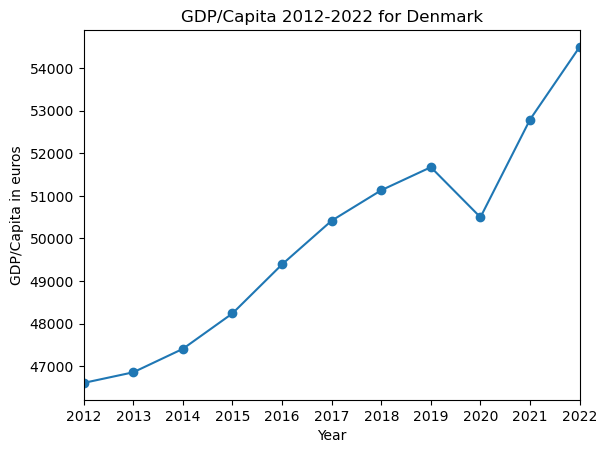

interactive(children=(Dropdown(description='Country_Name', index=9, options=('Albania', 'Austria', 'Bosnia and…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [34]:
model.plot_line(Country_Name='Denmark')

In [41]:
model.plot_choropleth()